In [1]:
import cv2 ###  pip install opencv-python  Shift + enter
## pip install opencv-contrib-python    fullpackage

In [9]:
from deepface import DeepFace  ## pip install deepface

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
import joblib

In [55]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [48]:
import numpy as np
np.unique(y,axis=0)

array([0, 1, 2])

In [56]:
clf_decisiontree = DecisionTreeClassifier(criterion = "entropy",random_state=0)

In [57]:
# Train model
model = clf_decisiontree.fit(X,y)

In [58]:
model.predict([[2,3,4,5]])

array([2])

In [65]:
joblib.dump(model,"model_joblib.pkl")

['model_joblib.pkl']

In [46]:
img = cv2.imread('boy.jpeg')

In [43]:
import matplotlib.pyplot as plt

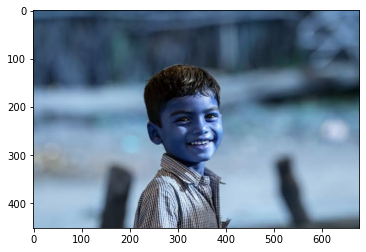

In [44]:
plt.imshow(img) ## BGR

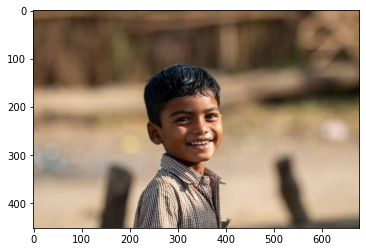

In [45]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [31]:
predictions = DeepFace.analyze(img)

Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.34it/s]


In [32]:
predictions

{'emotion': {'angry': 2.067136878336484e-08,
  'disgust': 9.324649866352638e-22,
  'fear': 7.755120157160178e-09,
  'happy': 100.0,
  'sad': 9.362890462938367e-08,
  'surprise': 7.906285626191334e-08,
  'neutral': 1.3304894295670944e-10},
 'dominant_emotion': 'happy',
 'age': 29,
 'gender': 'Woman',
 'race': {'asian': 40.48938041798835,
  'indian': 20.17865719540801,
  'black': 24.68712177123091,
  'white': 0.14579226836693507,
  'middle eastern': 0.07312381929703883,
  'latino hispanic': 14.425932100526344},
 'dominant_race': 'asian'}

In [33]:
type(predictions)

dict

In [34]:
predictions['dominant_emotion']

'happy'

# we are trying to draw a rectangle across the face

In [35]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [37]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  #print(faceCascade.empty())
faces = faceCascade.detectMultiScale(gray,1.1,4)

# Draw a rectangle around the faces
for(x,y,w,h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0,255,0), 2)

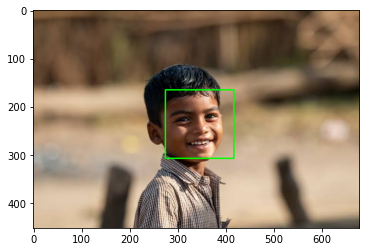

In [38]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [40]:
font = cv2.FONT_HERSHEY_SIMPLEX

# Use putText() method for
# inserting text on video
cv2.putText(img,
           predictions['dominant_emotion'],
           (0,50),
           font, 2,
           (0,0,255),
           2,
           cv2.LINE_4);

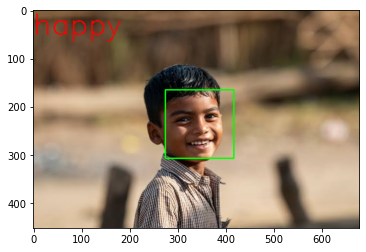

In [41]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [50]:
img =cv2.imread('neutral.jpeg')

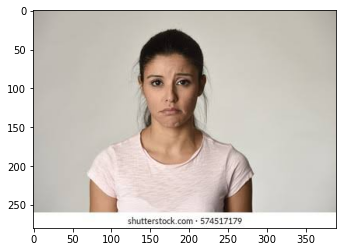

In [51]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [48]:
predictions = DeepFace.analyze(img)

Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.09it/s]


In [52]:
predictions

{'emotion': {'angry': 4.279908978332969e-05,
  'disgust': 2.617576768944134e-12,
  'fear': 0.00032971531709335977,
  'happy': 0.003016316259163432,
  'sad': 0.2036703983321786,
  'surprise': 3.1261935262705265e-07,
  'neutral': 99.79294538497925},
 'dominant_emotion': 'neutral',
 'age': 28,
 'gender': 'Woman',
 'race': {'asian': 5.005684420805241,
  'indian': 12.131810166347632,
  'black': 1.0653423780406939,
  'white': 27.36092372899793,
  'middle eastern': 17.260995045959653,
  'latino hispanic': 37.17524630875864},
 'dominant_race': 'latino hispanic'}

In [54]:
img =cv2.imread('sad.jpeg')

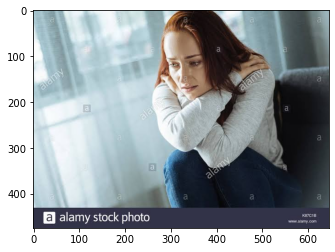

In [55]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [59]:
predictions = DeepFace.analyze(img)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.43it/s]


In [61]:
predictions

{'emotion': {'angry': 0.0026168701620001254,
  'disgust': 5.963777605286627e-08,
  'fear': 0.6201189380955063,
  'happy': 3.9096484428434635,
  'sad': 95.45414420689012,
  'surprise': 2.3496072267188168e-05,
  'neutral': 0.013444972211009099},
 'dominant_emotion': 'sad',
 'age': 31,
 'gender': 'Man',
 'race': {'asian': 2.0120797142887454,
  'indian': 4.4691810644649195,
  'black': 0.44135888433648535,
  'white': 40.6189244247765,
  'middle eastern': 39.2014993188978,
  'latino hispanic': 13.256952076321593},
 'dominant_race': 'white'}

## Real time video demo for Face Emotion Recognition

In [44]:
import cv2 ###  pip install opencv-python 
## pip install opencv-contrib-python    fullpackage
from deepface import DeepFace  ## pip install deepface

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(3)
# Check if the webcam is opened correctly
if not cap.isOpened():
    cap =cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while True:
    ret,frame = cap.read()  ## read one image from a video
    result = DeepFace.analyze(frame, actions = ['emotion'])
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
      #print(faceCascade.empty())
        
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    
    
    # Draw a rectangle around the faces
    for(x,y,w,h)in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0,255,0), 2)
            
            
    font = cv2.FONT_HERSHEY_SIMPLEX
            
            # Use putText() method for
            # inserting text on video
            
    cv2.putText(frame,
                result['dominant_emotion'],
                (50,50),
                font, 3,
                (0,0,255),
                2,
                cv2.LINE_4)
    cv2.imshow('Demo video',frame)
    
    if cv2.waitKey() & 0xFF == ord('q'):
        break
        
    cap.release()
    cv2.destroyAllWindows()
    


            
            
        

            
    


  
    




TypeError: object of type 'NoneType' has no len()

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
import joblib

In [28]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [29]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [30]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [31]:
import numpy as np
np.unique(y,axis=0)

array([0, 1, 2])

In [32]:
clf_decisiontree = DecisionTreeClassifier(criterion = "entropy",random_state=0)

In [33]:
# Train model
model = clf_decisiontree.fit(X,y)

In [34]:
model.predict([[2,3,4,5]])

array([2])

In [35]:
import pickle

with open('model_pickle','wb') as f:
    pickle.dump(model,f)

In [36]:
import pickle

with open('model_pickle','rb') as f:
    mod = pickle.load(f)

In [37]:
mod.predict([[2,3,4,5]])

array([2])

In [38]:
joblib.dump(model,"model_joblib.pkl")

['model_joblib.pkl']

In [40]:
classifier = joblib.load('model_joblib.pkl')

In [41]:
new_obs = [[2,3,4,5]]

In [42]:
classifier.predict(new_obs)

array([2])